In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections


In [68]:
def link_percolation(G,p):
    G_copy = G.copy()
    N = len(G.nodes)
    G_copy.remove_edges_from([(n1,n2) for n1, n2, w in G_copy.edges(data='weight') if w>p])
    comp_gen = nx.connected_components(G_copy)
    gcc = sorted(comp_gen,key=len,reverse=True)[0]
    R = (len(gcc)/N)
    return R
def node_percolation(G, p):
    G_copy = G.copy()
    num_node = len(G.nodes())
    num_node_deleted = round((1-p) * num_node)
    node_list = np.random.permutation(list(G.nodes()))
    G_copy.remove_nodes_from(node_list[1:num_node_deleted])
    comp_gen = nx.connected_components(G_copy)
    largest_cc = len(max(nx.connected_components(G_copy), key=len))
    R = (largest_cc/N)
    return R

def percolationPlot(G,percolationType):
    list_R = []
    list_p = np.linspace(0, 1, 101)

    if percolationType == "node":
        def percolate(G,p):
            return node_percolation(G,p)
    elif percolationType == "link":
        def percolate(G,p):
            return link_percolation(G,p)
    
    for p in list_p:
        R = percolate(G,p)
        list_R.append(R)
    
    plt.plot(list_p,list_R)
    plt.xlabel('$p$')
    plt.ylabel('$R$')

def repeatedPercolationPlot(G,percolationType,repeat):
    list_R = []
    list_p = np.linspace(0, 1, 101)

    if percolationType == "node":
        def percolate(G,p):
            return node_percolation(G,p)
    elif percolationType == "link":
        def percolate(G,p):
            return link_percolation(G,p)
    
    for p in list_p:
        R_values = []
        for i in range(repeat):
            R = percolate(G,p)
            R_values.append(R)
        meanR=np.mean(R_values)
        list_R.append(meanR)
    
    plt.plot(list_p,list_R)
    plt.xlabel('$p$ - probability of retaining a node')
    plt.ylabel('$R$ - size of the giant component')
    plt.title("Node Percolation on an Protein-Protein Interaction Network")
def percolationPlotNew(G,percolationType):
    list_R = []
    list_p = np.linspace(0, 1, 101)

    if percolationType == "node":
        def percolate(G,p):
            return node_percolation(G,p)
    elif percolationType == "link":
        def percolate(G,p):
            return link_percolation(G,p)
    
    for p in list_p:
        R = percolate(G,p)
        list_R.append(R)
    
    return [list_p,list_R]

In [13]:
def addweightLink(G):
    weights = np.random.random(nx.number_of_edges(G))
    G.add_weighted_edges_from([(e[0][0], e[0][1], e[1]) for e in zip(G.edges(), weights)])
def addweightNode(G):
    weights = np.random.random(nx.number_of_edges(G))
    nx.set_node_attributes(G,{n: {"w": weights[n]} for n in G.nodes})

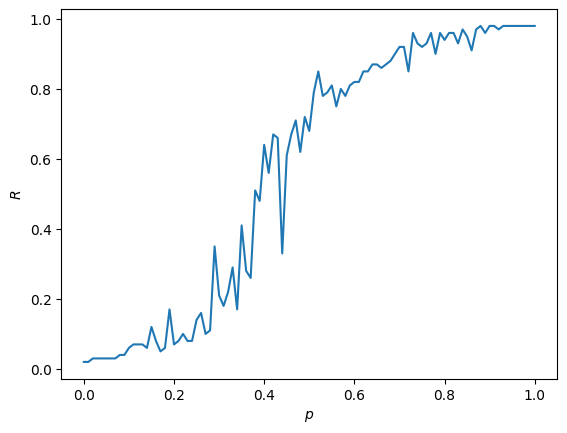

In [5]:
N = 100
c = 4
ErdosRenyi = nx.erdos_renyi_graph(N,c/N)
addweightNode(ErdosRenyi)
percolationPlot(ErdosRenyi,"node")

In [43]:
N = 50000
c = 4
m = 2
ER = nx.erdos_renyi_graph(N,c/N)
BA  = nx.barabasi_albert_graph(N,m)
addweightLink(ER)
addweightLink(BA)
plot1 = percolationPlotNew(BA,"link")
plot2 = percolationPlotNew(ER,"link")


Text(0.5, 1.0, 'Link Percolation on a Barabasi-Albert and Erdos-Renyi Network')

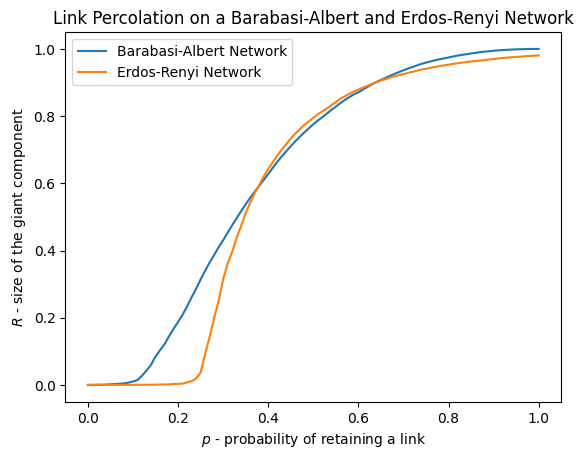

In [47]:
plt.plot(plot1[0],plot1[1],label="Barabasi-Albert Network")
plt.plot(plot2[0],plot2[1],label="Erdos-Renyi Network")
plt.legend()
plt.xlabel("$p$ - probability of retaining a link")
plt.ylabel("$R$ - size of the giant component")
plt.title("Link Percolation on a Barabasi-Albert and Erdos-Renyi Network")

<BarContainer object of 15 artists>

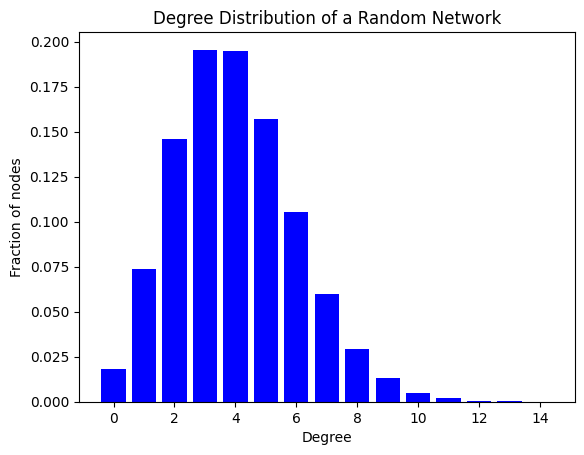

In [30]:
degree_sequence = sorted([d for n, d in ER.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
N = len(ER.nodes)
cnt = [item/N for item in cnt ]

plt.title("Degree Distribution of a Random Network")
plt.xlabel("Degree")
plt.ylabel("Fraction of nodes")
plt.bar(deg, cnt, width=0.80, color='b')

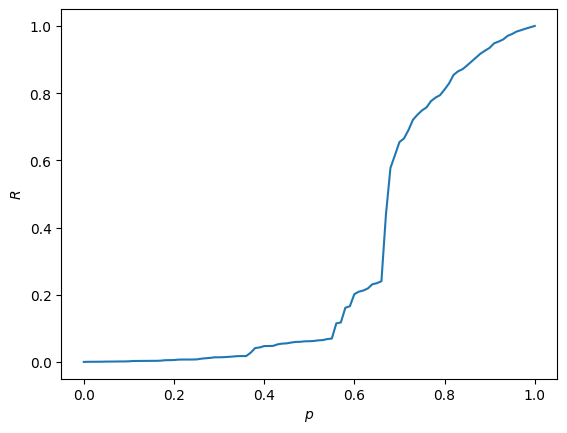

In [99]:
powerGrid = nx.Graph()
with open("inf-power.txt") as f:
    for line in f:
        strippedline = line.strip()
        two_nodes = strippedline.split(" ")
        powerGrid.add_edge(int(two_nodes[0]),int(two_nodes[1]))

addweightLink(powerGrid)
repeatedPercolationPlot(powerGrid,"link",20)


-2.844511411524359 0.7269110383467688


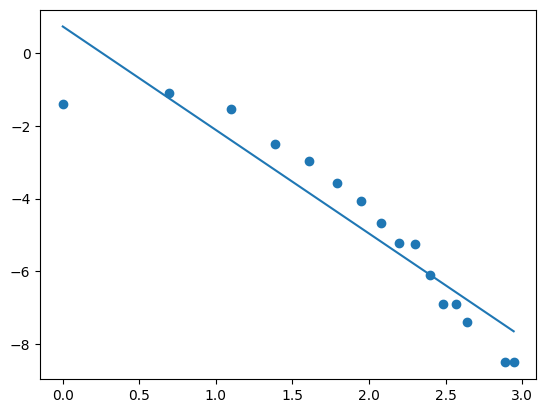

In [108]:
degree_sequence = sorted([d for n, d in powerGrid.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
N = len(powerGrid.nodes)
cnt = [item/N for item in cnt ]

x = np.log(deg)
y = np.log(cnt)

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x,a*x+b)

print(a,b)

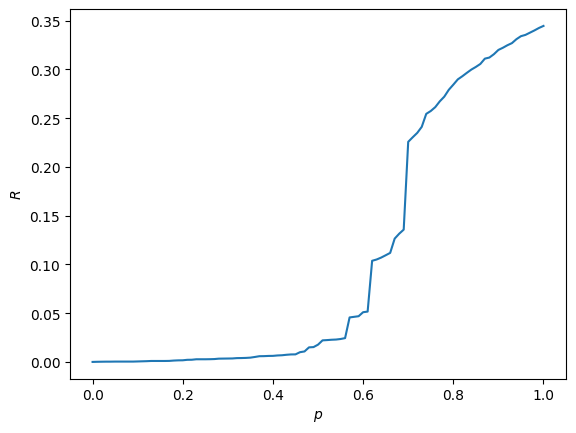

In [54]:
Gene = nx.Graph()
Gene.add_nodes_from(range(1,14341))
with open("inf-power.txt") as f:
    for line in f:
        strippedline = line.strip()
        edge = strippedline.split(" ")
        Gene.add_edge(int(edge[0]),int(edge[1]))

addweightLink(Gene)
repeatedPercolationPlot(Gene,"link",20)

(19, 18, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
[2.94443898 2.89037176 2.63905733 2.56494936 2.48490665 2.39789527
 2.30258509 2.19722458 2.07944154 1.94591015 1.79175947 1.60943791
 1.38629436 1.09861229 0.69314718 0.        ]
-2.844511411524359 -0.33857405696109194


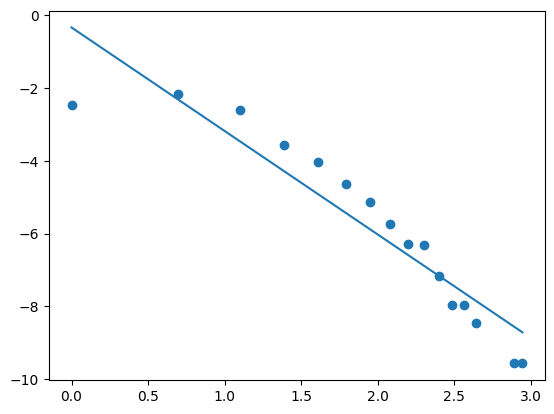

In [125]:
degree_sequence = sorted([d for n, d in Gene.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

N = len(Gene.nodes)
cnt = [item/N for item in cnt]
print(deg[:-1])
x = np.log(deg[:-1])
y = np.log(cnt[:-1])
print(x)

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x,a*x+b)

print(a,b)

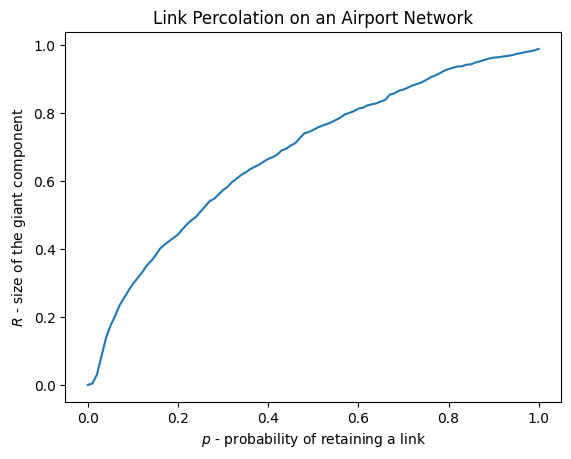

In [61]:
flight = nx.Graph()
with open("inf-openflights.txt") as f:
    for line in f:
        strippedline = line.strip()
        two_nodes = strippedline.split(" ")
        flight.add_edge(int(two_nodes[0]),int(two_nodes[1]))
"""
degree_sequence = sorted([d for n, d in flight.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
N = len(flight.nodes)
cnt = [item/N for item in cnt ]

x = np.log(deg)
y = np.log(cnt)

a, b = np.polyfit(x, y, 1)
plt.title("Degree Distribution for an Airport Network")
plt.scatter(x, y)
plt.plot(x,a*x+b)
plt.xlabel("log(degree)")
plt.ylabel("log(fraction of nodes)")
print(a,b)"""
addweightLink(flight)
repeatedPercolationPlot(flight,"link",20)

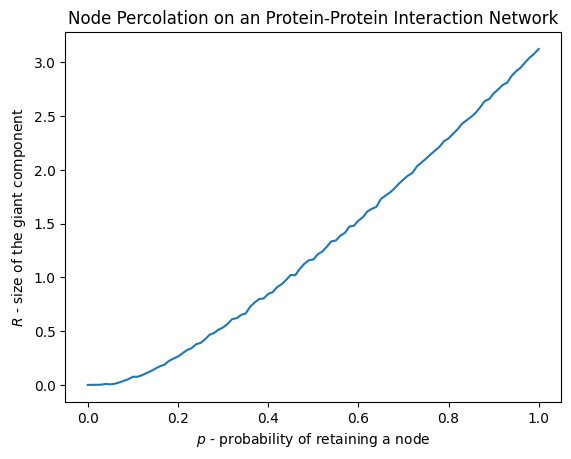

In [70]:
ppi = nx.Graph()
with open("bio-grid-human.txt") as f:
    for line in f:
        strippedline = line.strip()
        two_nodes = strippedline.split(",")
        ppi.add_edge(int(two_nodes[0]),int(two_nodes[1]))
"""degree_sequence = sorted([d for n, d in ppi.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
N = len(ppi.nodes)
cnt = [item/N for item in cnt ]

x = np.log(deg)
y = np.log(cnt)

a, b = np.polyfit(x, y, 1)
plt.title("Degree Distribution for a Protein-Protein Interaction Network")
plt.scatter(x, y)
plt.plot(x,a*x+b)
plt.xlabel("log(degree)")
plt.ylabel("log(fraction of nodes)")
print(a,b)"""
addweightLink(ppi)
repeatedPercolationPlot(ppi,"node",5)